# STA 141B: Homework 4
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Victoria

Last Name: Anorve 

Student ID: 

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Requesting freshness

In this portion, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1__ (20 pts)

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [1]:
#Import Modules
import requests
import json
import urllib.parse as urlparse
import pandas as pd

In [2]:
API_Key = "UKOIZpu1MAneoU2byi80z8iUJbN4tpIrWcScw859"

In [3]:
def ndb_search(API_Key, Term, Data_source = "Standard Reference", Group= ""):
    #two terms in function, term and the API key, which holds the data in the database
    response = requests.get("https://api.nal.usda.gov/ndb/search", params = {
    "api_key": API_Key,
    "q": Term,
    "ds": Data_source,
    "fg": Group,
    "format": "json"
    })
    
#Checking for errors-- got the above code from Gary in office hours he helped me
    response.raise_for_status() 
    try:
        list_out = response.json()['list']['item']
    except KeyError:
        list_out=[]
    return list_out

In [4]:
ndb_search(API_Key, Term = 'quail eggs', Data_source = "", Group = "")
print("Leave the arguments 'Data source and Group empty, so that the main focus lies on the output from the API key")
print("and the specific term that we are searching. In this instance, we are are looking at quail eggs.")

Leave the arguments 'Data source and Group empty, so that the main focus lies on the output from the API key
and the specific term that we are searching. In this instance, we are are looking at quail eggs.


__Exercise 1.2__ (20 pts)

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [5]:
#Converting Output of ndb_search() to a data frame with pd.DataFrame()
data_frame1 = ndb_search(API_Key,'quail eggs',Data_source = "", Group = "")
pd.DataFrame(data_frame1)

,ds,group,name,ndbno,offset
0,BL,Branded Food Products Database,"GRAN SABANA, QUAIL EGGS, UPC: 819140010103",45169279,0
1,BL,Branded Food Products Database,"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",45178254,1
2,BL,Branded Food Products Database,"CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186",45094707,2
3,BL,Branded Food Products Database,"L&W, QUAIL EGGS, UPC: 024072000256",45094890,3
4,BL,Branded Food Products Database,"BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098",45099560,4
5,SR,Dairy and Egg Products,"Egg, quail, whole, fresh, raw",01140,5


In [6]:
#Foods in the fresh.csv file. 
fresh = pd.read_csv("fresh.csv")
fresh.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit


In [7]:
#Want to extract the fruit and vegetable data from the government website 
#Goal: Extract an NDB number for every food
fruit_data = pd.io.json.json_normalize(ndb_search(API_Key, Term = "", Data_source = "Standard Reference", Group = "Fruits and Fruit Juices"))
veggie_data = pd.io.json.json_normalize(ndb_search(API_Key, Term = "", Data_source = "Standard Reference", Group = "Vegetables and Vegetable Products"))
#Append the fruit and veggie dataframes together-- to get into one data frame 
mixed = veggie_data.append(fruit_data)
#Select foods that are "raw"
mixed = mixed.loc[mixed.name.str.endswith(", raw"), :]
#Should only have fruit and veggie data that end with "raw"
mixed
print("We can observe that the fruit and vegetable data is now in one data frame.")

We can observe that the fruit and vegetable data is now in one data frame.


In [8]:
def food_fresh(food_name):
    fresh_1 = list(fresh['food'])
    food_name = " ".join(food_name.split("_"))+" raw"
    fresh_2 = ndb_search(API_Key, food_name)
    
    #Check for errors once more
    try:
        return fresh_2[0]['ndbno']
    except IndexError:
        return ""


In [9]:
#Checking function to ensure its use
food_fresh('Cucumber')

'11206'

In [10]:
#f strings 
ndbs = [food_fresh(x) for x in fresh.food]
#Data frame for ndbs
ndbs_df = pd.DataFrame(ndbs)
#Concatenate the fresh data frame with the ndbs data frame. We want to have one large data frame that 
#holds the fresh and ndbs data 
combine = (fresh, ndbs_df)
#Create entire data frame that holds the relevant data 
total_data = pd.concat(combine, axis =1)
total_data

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,0
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09221
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021


In [11]:
#Rename the 8th column, labeled as 0. Re-name the column to read: NDB
total_data.rename(columns={0:'NDB'}, inplace=True)
total_data
#The fresh data set now includes the NDB numbers 

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDB
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09221
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021


In [65]:
print("For 1.2, I used my function from 1.1 to analyze the data from the fresh fruit file.")
print("I converted it to a panda data frame so that it would be easier to see the data.")
print("My next step was to extract the fruit and vegetable data from the government website.")
print("I specifically checked that the data came from the “Standard Reference” source, as they are “unbranded” foods.")
print("I wanted the data in one data frame so I appended the fruit and vegetable data sets.")
print("I also only selected the fruits and vegetables that contained the word “raw” in them.")
print("I then created a function to extract an NDB number for each food in the fresh file.")
print("Again, the same rules applied in that the food had to have the word “raw” in it.")
print("I was successfully able to get the NDB number for the foods, and renamed the column to NDB so that it would be clearer to the reader.")

For 1.2, I used my function from 1.1 to analyze the data from the fresh fruit file.
I converted it to a panda data frame so that it would be easier to see the data.
My next step was to extract the fruit and vegetable data from the government website.
I specifically checked that the data came from the “Standard Reference” source, as they are “unbranded” foods.
I wanted the data in one data frame so I appended the fruit and vegetable data sets.
I also only selected the fruits and vegetables that contained the word “raw” in them.
I then created a function to extract an NDB number for each food in the fresh file.
Again, the same rules applied in that the food had to have the word “raw” in it.
I was successfully able to get the NDB number for the foods, and renamed the column to NDB so that it would be clearer to the reader.


__Exercise 1.3__ (20 pts)

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [12]:
API_Key = "UKOIZpu1MAneoU2byi80z8iUJbN4tpIrWcScw859"

In [13]:
#Input an NDB number as an argument, in order to return the list of nutrients in the food

def ndb_report(NDB):
    response = requests.get("https://api.nal.usda.gov/ndb/V2/reports", params = {
    "api_key": API_Key,
    "ndbno": NDB,
    "format": "json"
    })    
#Testing error
    response.raise_for_status() # check for errors
    try:
        list_out = response.json()['foods'][0]['food']['nutrients']
    except KeyError:
        list_out=[]
    return list_out

In [14]:
ndb_report("09279")#For raw plumns

[{'derivation': 'NONE',
  'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g',
    'label': 'cup, sliced',
    'qty': 1.0,
    'value': '143.93'},
   {'eqv': 66.0,
    'eunit': 'g',
    'label': 'fruit (2-1/8" dia)',
    'qty': 1.0,
    'value': '57.57'},
   {'eqv': 151.0,
    'eunit': 'g',
    'label': 'NLEA serving',
    'qty': 1.0,
    'value': '131.72'}],
  'name': 'Water',
  'nutrient_id': '255',
  'unit': 'g',
  'value': '87.23'},
 {'derivation': 'NC',
  'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g',
    'label': 'cup, sliced',
    'qty': 1.0,
    'value': '76'},
   {'eqv': 66.0,
    'eunit': 'g',
    'label': 'fruit (2-1/8" dia)',
    'qty': 1.0,
    'value': '30'},
   {'eqv': 151.0,
    'eunit': 'g',
    'label': 'NLEA serving',
    'qty': 1.0,
    'value': '69'}],
  'name': 'Energy',
  'nutrient_id': '208',
  'unit': 'kcal',
  'value': '46'},
 {'derivation': 'NONE',
  'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g

In [68]:
data_frame2 = ndb_report("09279")
pd.DataFrame(data_frame2)  #Data frame for plumns--makes data easier to see data

,derivation,group,measures,name,nutrient_id,unit,value
0,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Water,255,g,87.23
1,NC,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Energy,208,kcal,46
2,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Protein,203,g,0.70
3,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...",Total lipid (fat),204,g,0.28
4,NC,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Carbohydrate, by difference",205,g,11.42
5,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Fiber, total dietary",291,g,1.4
6,NONE,Proximates,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Sugars, total",269,g,9.92
7,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Calcium, Ca",301,mg,6
8,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Iron, Fe",303,mg,0.17
9,NONE,Minerals,"[{'label': 'cup, sliced', 'eqv': 165.0, 'eunit...","Magnesium, Mg",304,mg,7


__Exercise 1.4__ (20 pts) Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/victoriaanorve/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


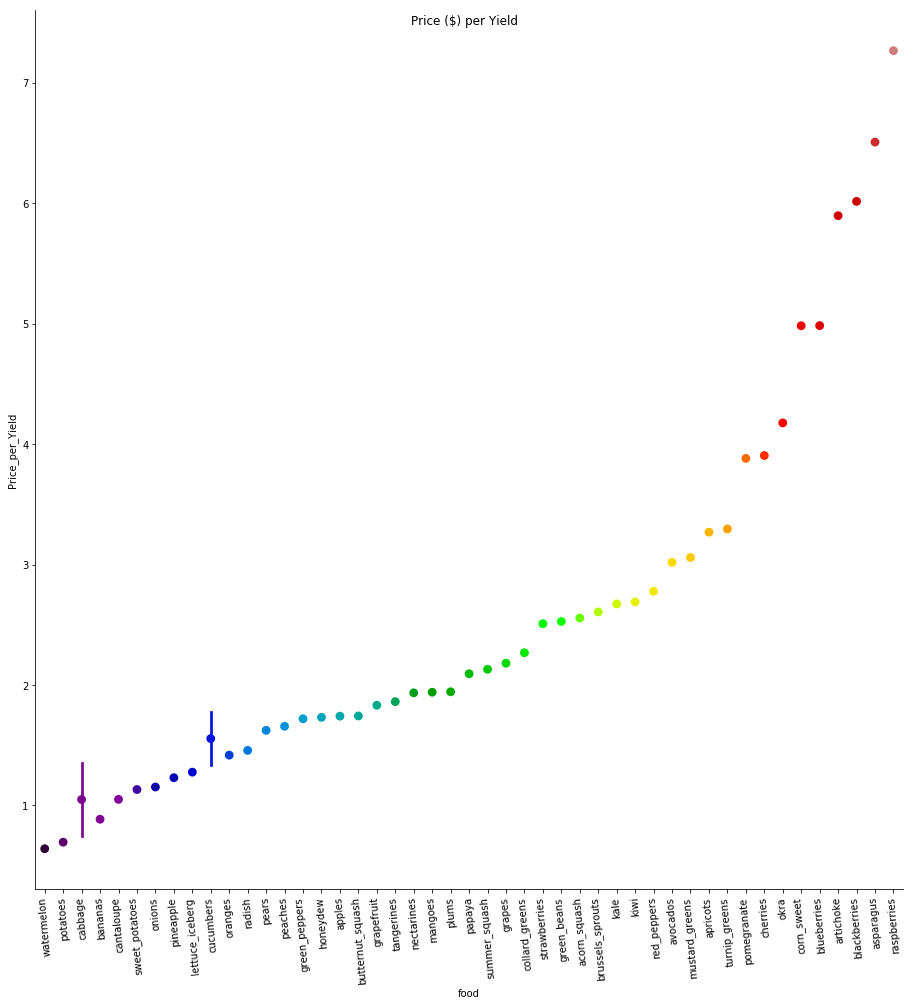

In [70]:
#To see which foods provide the best combination of price, yield, and nutrition, we look at the macronutrients
#Macronutrients are divided into carbohydrates (sugar), lipids (fats), and proteins 
#Each of these macronutrients provides energy in the form of calories 
#First make another column in the original 
total_data['Price_per_Yield'] = total_data['price_per_lb']/total_data['yield']
#Graph 1
total_data = total_data.sort_values(by = "Price_per_Yield", axis = 0, ascending = True, inplace = False, kind = 'quicksort')
graph1 = sns.factorplot("food", "Price_per_Yield", data = total_data, palette = "spectral", kind = "point", size = 13)
graph1.set_xticklabels(rotation=95)
graph1.fig.suptitle('Price ($) per Yield')
plt.show(graph1)

In [79]:
print("Evident that the foods with the lowest price and yield is watermelon, potatoes, and cabbage. Brussel Sprouts")
print("Also offers the best protein/nutritional value.")


Evident that the foods with the lowest price and yield is watermelon, potatoes, and cabbage. Brussel Sprouts
Also offers the best protein/nutritional value.


In [73]:
#Now 
#Look at the macronutrients: Protein to measure the nutrients 
#For loop and statement
Protein = print([[a["value"] for a in ndb_report(b) if 'Energy' in a["name"]] for b in total_data.NDB])

[['30'], ['58'], ['19'], ['89'], ['34'], ['86'], ['40'], ['50'], ['14'], ['12'], ['19'], ['49'], ['16'], ['57'], ['39'], ['20'], ['36'], ['52'], ['45'], ['12'], ['37'], ['43'], ['44'], ['60'], ['46'], ['43'], ['18'], ['57'], ['32'], ['32'], ['31'], ['40'], ['43'], ['49'], [], ['31'], ['167'], ['27'], ['48'], ['32'], ['83'], ['33'], ['33'], ['86'], ['57'], ['73'], ['43'], ['20'], ['52']]
[['7.55'], ['12.44'], ['3.14'], ['22.84'], ['8.16'], ['20.12'], ['9.34'], ['13.12'], ['2.97'], ['2.16'], ['3.14'], ['11.89'], ['3.40'], ['15.23'], ['9.54'], ['4.64'], ['9.09'], ['13.81'], ['11.69'], ['2.16'], ['9.09'], ['10.10'], ['10.55'], ['14.98'], ['11.42'], ['10.82'], ['3.84'], ['13.93'], ['5.42'], ['7.68'], ['6.97'], ['10.42'], ['8.95'], ['8.75'], [], ['6.03'], ['8.64'], ['4.67'], ['11.12'], ['7.13'], ['18.70'], ['7.49'], ['7.45'], ['19.02'], ['14.49'], ['17.44'], ['9.61'], ['3.88'], ['11.94']]
[['0.15'], ['0.10'], ['0.20'], ['0.33'], ['0.19'], ['0.05'], ['0.10'], ['0.12'], ['0.14'], ['0.16'], ['0

In [78]:
total_data

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDB,Price_per_Yield,Protein
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326,0.641177,[0.61]
31,Fresh1,0.564320,0.811301,0.264555,0.184017,potatoes,vegetables,11362,0.695574,[2.57]
36,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944,cabbage,vegetables,11503,0.743722,[2.60]
14,Fresh1,0.566983,0.640000,0.330693,0.292965,bananas,fruit,09040,0.885912,[1.09]
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181,1.050733,[0.84]
38,Fresh1,0.918897,0.811301,0.440925,0.499400,sweet_potatoes,vegetables,11507,1.132621,[1.57]
28,Fresh1,1.038107,0.900000,0.352740,0.406868,onions,vegetables,11282,1.153452,[1.10]
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266,1.230710,[0.54]
27,Fresh1,1.213039,0.950000,0.242508,0.309655,lettuce_iceberg,vegetables,11252,1.276884,[0.90]
25,"Fresh, consumed with peel1",1.295931,0.970000,0.264555,0.353448,cucumbers,vegetables,11206,1.336012,[0.59]
